In [1]:
import numpy as np
import os
import shutil
from datetime import datetime, timedelta
import pandas as pd
from glob import glob
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit

def linear_fn(x,a,b):
    return a*x+b

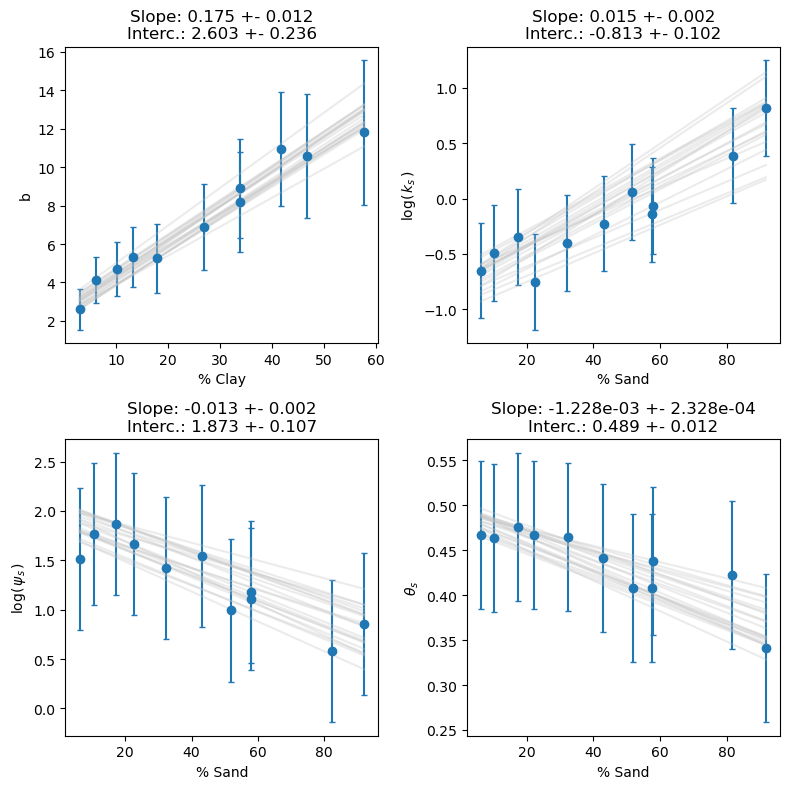

In [17]:
data = pd.read_csv('hydraulic_parameters/b.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = 0.92 + 0.0492*data.x

fig,axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].errorbar(data.x,data.y,SD,fmt='o',capsize=2)
axes[0,0].set_xlabel('% Clay')
axes[0,0].set_ylabel('b')

res_ = curve_fit(linear_fn, data.x, data.y, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
axes[0,0].set_title('Slope: %3.3f +- %3.3f\nInterc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    axes[0,0].plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)
    
    
    
data = pd.read_csv('hydraulic_parameters/k_s.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = 0.43*np.ones(len(data))

# plt.figure()
axes[0,1].errorbar(data.x,data.y,SD,fmt='o',capsize=2)
axes[0,1].set_xlabel('% Sand')
axes[0,1].set_ylabel('log($\,k_s\,$)')

res_ = curve_fit(linear_fn, data.x, data.y, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
axes[0,1].set_title('Slope: %3.3f +- %3.3f\nInterc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    axes[0,1].plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)
    

data = pd.read_csv('hydraulic_parameters/psi_s.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = 0.72*np.ones(len(data))

# plt.figure()
axes[1,0].errorbar(data.x,data.y,SD,fmt='o',capsize=2)
axes[1,0].set_xlabel('% Sand')
axes[1,0].set_ylabel('log($\,\psi_s\,$)')

res_ = curve_fit(linear_fn, data.x, data.y, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
axes[1,0].set_title('Slope: %3.3f +- %3.3f\nInterc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    axes[1,0].plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)
    
data = pd.read_csv('hydraulic_parameters/theta_s.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = (8.23/100)*np.ones(len(data))


# plt.figure()
axes[1,1].errorbar(data.x,data.y/100,SD,fmt='o',capsize=2)
axes[1,1].set_xlabel('% Sand')
axes[1,1].set_ylabel(r'$\theta_s$')

res_ = curve_fit(linear_fn, data.x, data.y/100, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
axes[1,1].set_title('Slope: %3.3e +- %3.3e\nInterc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    axes[1,1].plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)
    
fig.tight_layout()
fig.savefig('figures/pedotrfn.png')
fig.savefig('figures/pedotrfn.pdf')

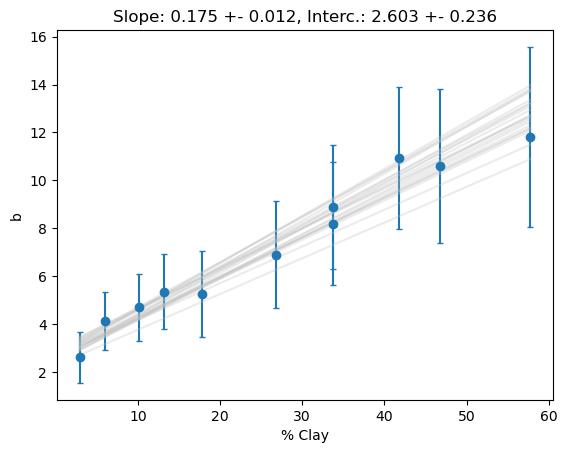

In [2]:
data = pd.read_csv('hydraulic_parameters/b.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = 0.92 + 0.0492*data.x

plt.figure()
plt.errorbar(data.x,data.y,SD,fmt='o',capsize=2)
plt.xlabel('% Clay')
plt.ylabel('b')

res_ = curve_fit(linear_fn, data.x, data.y, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
plt.title('Slope: %3.3f +- %3.3f, Interc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    plt.plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)

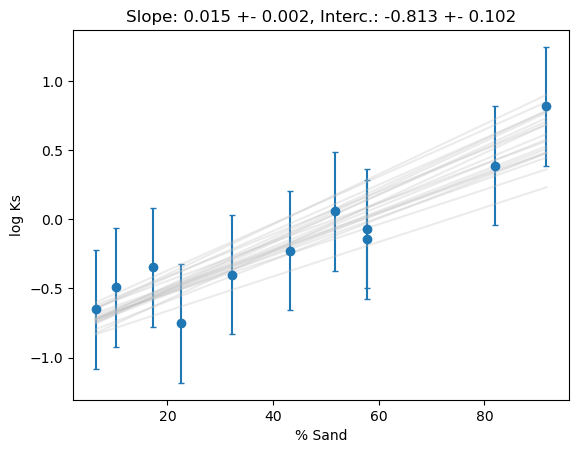

In [51]:
data = pd.read_csv('hydraulic_parameters/k_s.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = 0.43*np.ones(len(data))

plt.figure()
plt.errorbar(data.x,data.y,SD,fmt='o',capsize=2)
plt.xlabel('% Sand')
plt.ylabel('log Ks')

res_ = curve_fit(linear_fn, data.x, data.y, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
plt.title('Slope: %3.3f +- %3.3f, Interc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    plt.plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)

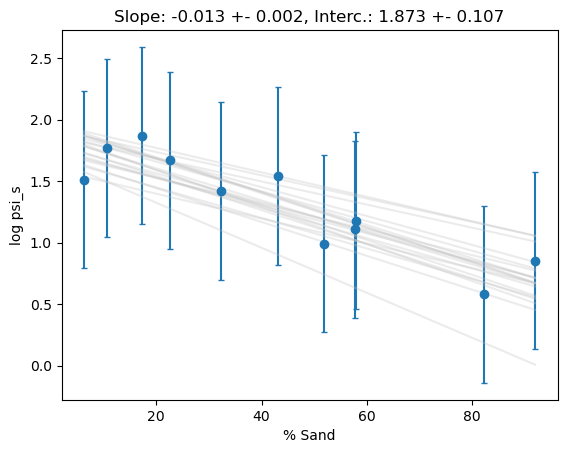

In [47]:
data = pd.read_csv('hydraulic_parameters/psi_s.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = 0.72*np.ones(len(data))

plt.figure()
plt.errorbar(data.x,data.y,SD,fmt='o',capsize=2)
plt.xlabel('% Sand')
plt.ylabel('log psi_s')

res_ = curve_fit(linear_fn, data.x, data.y, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
plt.title('Slope: %3.3f +- %3.3f, Interc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    plt.plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)

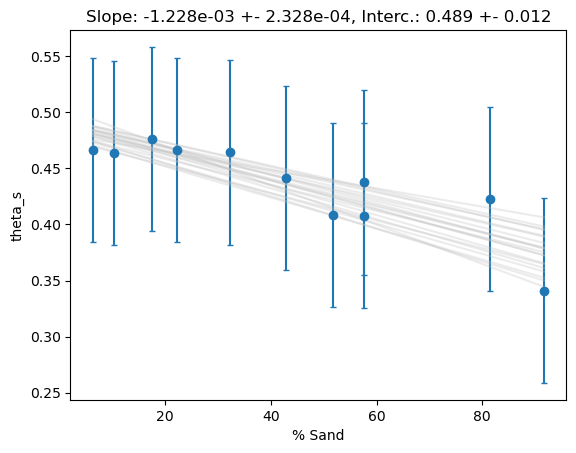

In [93]:
data = pd.read_csv('hydraulic_parameters/theta_s.csv',delimiter=';',header=None,decimal=',',names=['x','y'])
SD = (8.23/100)*np.ones(len(data))

plt.figure()
plt.errorbar(data.x,data.y/100,SD,fmt='o',capsize=2)
plt.xlabel('% Sand')
plt.ylabel('theta_s')

res_ = curve_fit(linear_fn, data.x, data.y/100, sigma=SD)
a = res_[0][0]
b = res_[0][1]
perr = np.sqrt(np.diag(res_[1]))
plt.title('Slope: %3.3e +- %3.3e, Interc.: %3.3f +- %3.3f' % (a,perr[0],b,perr[1])) 

for i in range(20):
    a_ = a + np.random.normal(0,perr[0])
    b_ = b + np.random.normal(0,perr[1])
    plt.plot(data.x,linear_fn(data.x,a_,b_),color='silver',alpha=.3)

In [94]:
data = xr.load_dataset('/p/project/cjibg36/kaandorp2/eTSMP_setups/setup_eclm_cordex_444x432_v3/input_clm/clm5_params.c171117.nc')
data['b_slope'] = 0.159
data['b_intercept'] = 2.91
data['log_psis_slope'] = -0.0131
data['log_psis_intercept'] = 1.88
data['log_ks_slope'] = 0.0153
data['log_ks_intercept'] = -0.884
data['thetas_slope'] = -0.126/100.
data['thetas_intercept'] = 48.9/100.



In [95]:
data.to_netcdf('/p/project/cjibg36/kaandorp2/eTSMP_setups/setup_eclm_cordex_444x432_v4/input_clm/clm5_params.c171117.nc')
data.close()

In [97]:
data = xr.load_dataset('/p/project/cjibg36/kaandorp2/eTSMP_setups/setup_eclm_cordex_444x432_v4/input_clm/clm5_params.c171117.nc')
data.thetas_slope


<xarray.DataArray 'thetas_slope' ()>
array(-0.00126)

In [76]:
#k
# undecomposed (fibrid) peat
k_fibric = np.array([
    1.28e-4, 3.81e-4, 1e-5, 5e-5, 1.5e-4, 4e-5, 8.5e-5, 1.7e-4, 4.5e-4, 2.8e-4,
    5e-5, 1e-3, 3e-6, 1e-6, 3e-7, 2.2e-3, 1.5e-3, 9e-4, 5e-4, 1.6e-3, 7.2e-4, 1.4e-3
            ])*1000 #mm/s
print('mean: %3.3e' % np.mean(np.log10(k_fibric)))
print(10**np.mean(np.log10(k_fibric)))
print('sigma: %3.3e' % np.std(np.log10(k_fibric)))
print(10**np.std(np.log10(k_fibric)))


# sapric(humid) peat
k_sapric = np.array([
    5e-8, 5e-7, 4e-7, 1e-7, 3e-6, 5e-6, 5e-7, 1e-7, 2e-10, 1e-12, 2e-8, 2e-7, 6.3e-8
            ])*1000
print('mean: %3.3e' % np.mean(np.log10(k_sapric)))
print(10**np.mean(np.log10(k_sapric)))
print('sigma: %3.3e' % np.std(np.log10(k_sapric)))




mean: -8.883e-01
0.1293385275637487
sigma: 1.042e+00
11.020868631399845
mean: -4.263e+00
5.454188438566652e-05
sigma: 1.721e+00


In [34]:
z = np.linspace(0,3,100)
zapric=.5
om_watsat = np.max(np.array([0.93 - 0.1*(z/zapric), 0.83*np.ones(len(z))]),axis=0) 
om_b = np.min(np.array([ 2.7+9.3*(z/zapric), 12*np.ones(len(z)) ]),axis=0) 
om_sucsat = np.max(np.array([ 10.3 - 0.2*(z/zapric), 10.1*np.ones(len(z)) ]),axis=0) 
om_hksat = np.max(np.array([ 0.28 - 0.2799*(z/zapric), 0.1*np.ones(len(z)) ]),axis=0) 

/tmp/ipykernel_21656/3478276036.py:21: RuntimeWarning: divide by zero encountered in power
  plt.plot(thl_thp,1.01*(thl_thp)**-5.0)
/tmp/ipykernel_21656/3478276036.py:22: RuntimeWarning: divide by zero encountered in power
  plt.plot(thl_thp,0.7*(thl_thp)**-2.5)


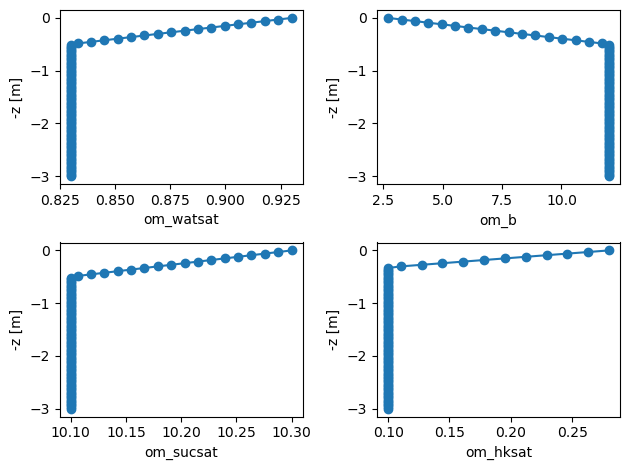

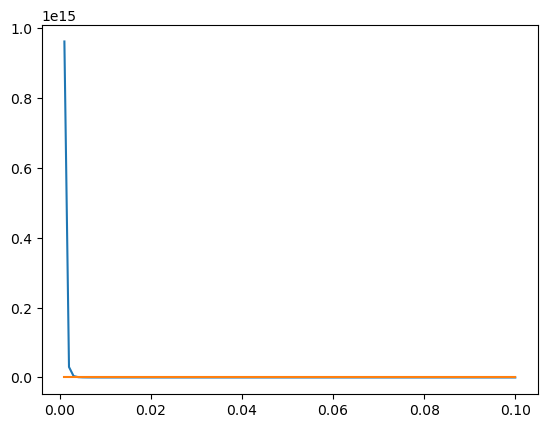

In [35]:
fig,ax = plt.subplots(2,2)
ax[0,0].plot(om_watsat,-z,'o-')
ax[0,0].set_ylabel('-z [m]')
ax[0,0].set_xlabel('om_watsat')

ax[0,1].plot(om_b,-z,'o-')
ax[0,1].set_ylabel('-z [m]')
ax[0,1].set_xlabel('om_b')

ax[1,0].plot(om_sucsat,-z,'o-')
ax[1,0].set_ylabel('-z [m]')
ax[1,0].set_xlabel('om_sucsat')

ax[1,1].plot(om_hksat,-z,'o-')
ax[1,1].set_ylabel('-z [m]')
ax[1,1].set_xlabel('om_hksat')
fig.tight_layout()

thl_thp = np.linspace(0,.1,100)
plt.figure()
plt.plot(thl_thp,1.01*(thl_thp)**-5.0)
plt.plot(thl_thp,0.7*(thl_thp)**-2.5)
